In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random, time, sys, math
from som import SOM, plot_data_on_map
from mpl_toolkits.mplot3d import Axes3D


## Generate data
This example notebook uses randomly generated RGB color vectors as data. There are 1000 vectors each 3 long (R, G and B channels). The vectors are arranged to six different clusters.

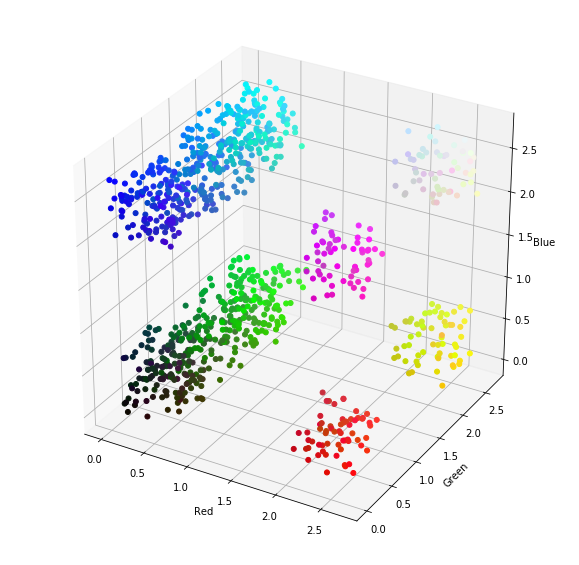

In [2]:
# Generate the data
dataset = np.random.randint(0, 2, size=(1000, 3)).astype(np.float32) * 2
dataset[:500, 1] = np.linspace(0, 2, 500)
dataset[:500, 0] = 0
dataset += np.random.rand(1000, 3) * .7

# Create the colors for the vectors and scale the values to [0, 1]
colors = dataset.copy()
colors -= np.min(colors)
colors /= np.max(colors)

# Slice the dataset to three axes for 3D plotting
reds = dataset[:, 0]
greens = dataset[:, 1] 
blues = dataset[:, 2]

# Plot the data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(reds, greens, blues, c=colors, alpha=1, s=100, marker='.')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

## Create Self Organizing Map 
 
The map size can be selected according to personal preferences. There are some rules of thumb that 'good' map node count could be estimated as 5 x sqrt(n) where n is the number of data vectors (ref. https://www.colorado.edu/geography/babs/webpage/publications/AAG_2010_Wendel_Buttenfield.pdf)  With the 1000 points in this example it would mean approx 13 x 13 map when using square map shape. The channel amount must match to the vector dimension in the dataset (last dimension in the dataset Numpy array).

The fit method uses 50% random sampling per iteration, i.e. not all dataset values are used. This is possible when the dataset clusters are expected to be pretty well defined. 

In [3]:
# Create the SOM instance.
som = SOM()
som.create(width=13, height=13, ch=3)

# Fit the map to the dataset using total 20 optimization rounds.
som.fit(dataset, random_sampling=0.5, n_iter=20, dist_method='euclidean')

Processing SOM iteration 1/20 [====================>] Average distance = 0.55542
Processing SOM iteration 2/20 [====================>] Average distance = 0.45646
Processing SOM iteration 3/20 [====================>] Average distance = 0.43039
Processing SOM iteration 4/20 [====================>] Average distance = 0.38326
Processing SOM iteration 5/20 [====================>] Average distance = 0.35641
Processing SOM iteration 6/20 [====================>] Average distance = 0.31670
Processing SOM iteration 7/20 [====================>] Average distance = 0.30731
Processing SOM iteration 8/20 [====================>] Average distance = 0.28078
Processing SOM iteration 9/20 [====================>] Average distance = 0.27230
Processing SOM iteration 10/20 [====================>] Average distance = 0.25726
Processing SOM iteration 11/20 [====================>] Average distance = 0.26064
Processing SOM iteration 12/20 [====================>] Average distance = 0.24908
Processing SOM iteration 

## Find data vector locations on the map

The find_maching_nodes method calculates the best map locations for the dataset vectors. 

In [4]:
data_locations, vect_distances = som.find_maching_nodes(dataset)

Finding mathing nodes [====================>] Done


## Plot the map vectors 
This is just a semi-informational illustration of the map vector space. The map can be plotted directly as RGB image, since the vector length is 3. 

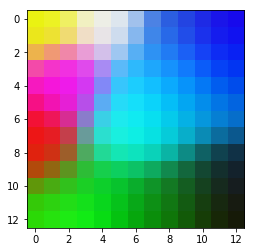

In [5]:
map_vectors = som.get_map_vectors().copy()

# Scale the values to [0, 1]
map_vectors -= np.min(map_vectors)
map_vectors /= np.max(map_vectors)
plt.imshow(map_vectors)
plt.show()

## Get the map U-matrix
U-matrix is 2D array where each cell represents the average map vector distance (euclidean) to the neighbor cells. 
It can be used to illustrate map clusters, since typically at cluster center the distances are small (colors are dark). Distances get bigger (color is lighter) at cluster borders. 

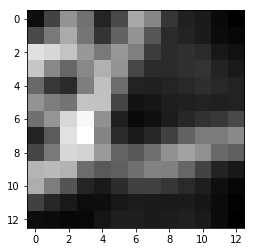

In [9]:
umatrix = som.get_umatrix()
plt.imshow(umatrix, cmap='gray')

## Plot the data vectors on the trained map
This plots the U-matrix and then overlays the data vectors as dots on top of it. In this example the data vectors are directly used as plotting colors. In other use cases the colors can be selected to illustrated some desired characteristic of the data. Here the U-matrix colors are inverted, which often works better for illustrations. The resulting picture is automatically saved to png file. 

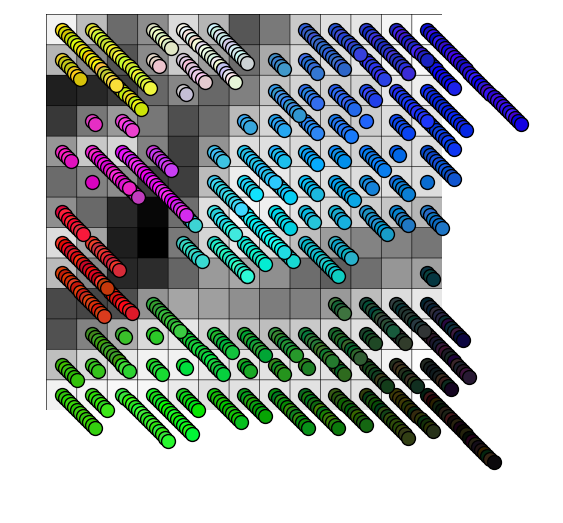

Image saved to SOM_mapping_1535913368.png


In [7]:
# Define colors for the data points. In this case we just scale the values to [0, 1]
colors = dataset.copy()
colors -= np.min(colors)
colors /= np.max(colors)

plot_data_on_map(umatrix, data_locations, data_colors=colors, 
                 node_width=50, data_marker_size=100)     

## Inspect the map component planes
This demonstrates the vector component planes of the map. Component plane is just slice of the map in the feature (vector component) dimension. 

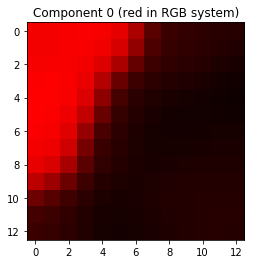

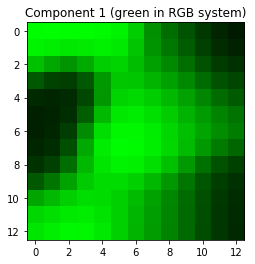

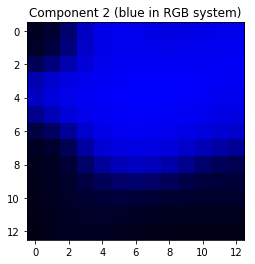

In [10]:
# Define plot colors for the component planes
colors = {0 : 'red', 1 : 'green', 2 : 'blue'}

# Plot the component planes
for i in range(3):
    cplane = som.get_component_plane(i)
    img = np.zeros(cplane.shape + (3,))
    img[:, :, i] = cplane
    img -= np.min(img)
    img /= np.max(img)
    plt.imshow(img)
    plt.title(f'Component {i} ({colors[i]} in RGB system)' )
    plt.show()